In [19]:
import numpy as np
from src.features import binary
from src.data import load_psi, Species

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression

In [4]:
human_dataset = load_psi(Species.human, independent=False)
mouse_dataset = load_psi(Species.mouse, independent=False)
yeast_dataset = load_psi(Species.yeast, independent=False)

In [13]:
binary_encoder = binary.Encoder()

[[list([0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0])]
 [list([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])]
 [list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.

/Users/arish/workspace/research/rna_modification/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arish/workspace/research/rna_modification/venv/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: Singleton array nan cannot be considered a valid collection.

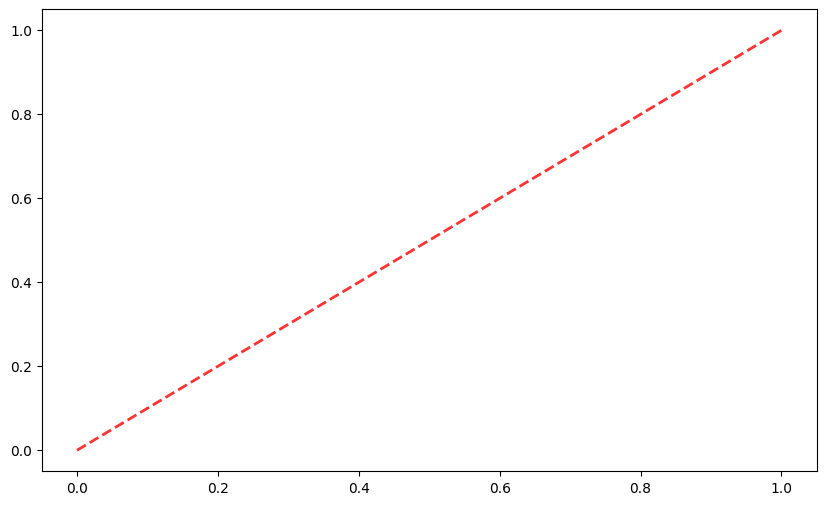

In [23]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for train, test in human_dataset.k_fold(k=5):

    train_y = train.targets
    train_x = binary_encoder.fit_transform(train.samples)
    print(train_x.values)
    break

    test_y = test.targets
    test_x = binary_encoder.fit_transform(test.samples)

    model = LinearRegression()
    model.fit(train_x, train_y)

    y_pred_prob = model.predict_proba(test_x)[:, 1]

    # Compute ROC curve and AUC for the current fold
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Append the results to the lists
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Set the first value of tpr to 0
    aucs.append(roc_auc)

plt.figure(figsize=(10, 6))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i + 1, aucs[i]))

# Plot the diagonal line representing the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random Classifier', alpha=0.8)

# Compute the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# Plot the mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', lw=2,
         label='Mean ROC (AUC = %0.2f)' % mean_auc)

# Set the labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show the plot
plt.show()